In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance


In [32]:
data = pd.read_csv("survey lung cancer.csv")

# Cleaning the dataset

In [33]:
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])

# Check for missing values (Just for confirmation, can be commented out if not needed)
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)
print()

# Check for duplicate entries and remove them
data.drop_duplicates(inplace=True)
if data.duplicated().any():
    print("There are duplicate entries in this dataset.")
else:
    print("There are no duplicate entries in this dataset.")
    
# Filtering for positive lung cancer cases
data_positive = data[data["LUNG_CANCER"] == 1]
print()
print(data_positive)

Missing values in each column:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

There are no duplicate entries in this dataset.

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
5         0   75        1               2        1              1   
6         1   52        2               1        1              1   
7         0   51        2               2        2              2   
..      ...  ...      ...             ...      ...         

# HeatMap and Co-relation Matrix for positive lung cancer cases


Correlation Matrix:
                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.013120  0.041131       -0.202506 -0.152032   
AGE                   -0.013120  1.000000 -0.073410        0.025773  0.050605   
SMOKING                0.041131 -0.073410  1.000000       -0.020799  0.153389   
YELLOW_FINGERS        -0.202506  0.025773 -0.020799        1.000000  0.558344   
ANXIETY               -0.152032  0.050605  0.153389        0.558344  1.000000   
PEER_PRESSURE         -0.261427  0.037848 -0.030364        0.313067  0.210278   
CHRONIC DISEASE       -0.189925 -0.003431 -0.149415        0.015316 -0.006938   
FATIGUE               -0.079020  0.021606 -0.037803       -0.099644 -0.181474   
ALLERGY                0.150174  0.037139 -0.030179       -0.147130 -0.159451   
WHEEZING               0.121047  0.052803 -0.147081       -0.058756 -0.174009   
ALCOHOL CONSUMING      0.434264  0.052049 -0.052771       -0.273643 -0.152228   
COUGHIN

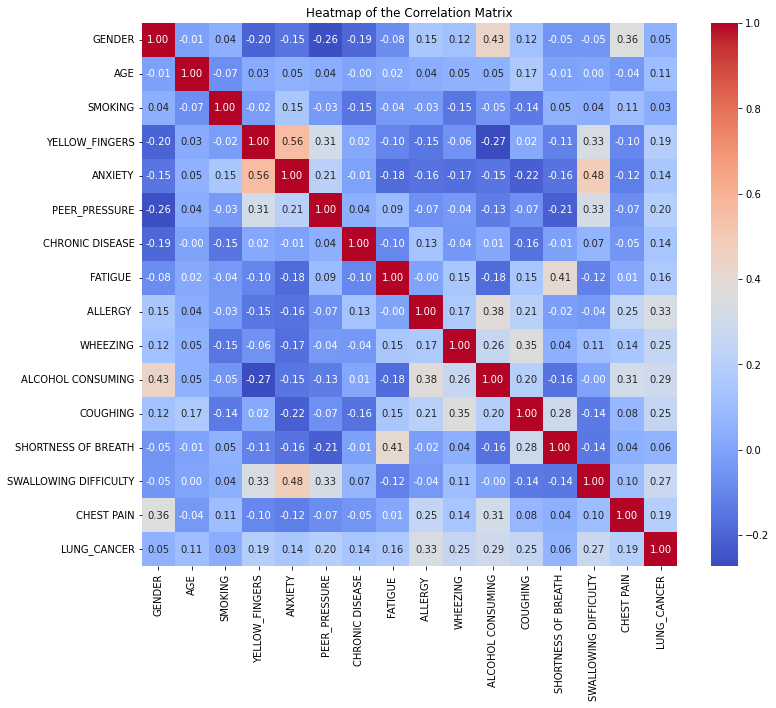

In [34]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of the Correlation Matrix')
plt.show()

# Logistic Regression

In [35]:
# Step 1: Data Preparation
X = data.drop('LUNG_CANCER', axis=1)  # Features
y = data['LUNG_CANCER']  # Target variable

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_str)

# Step 5: Print the most influential features
coefficients = model.coef_[0]

# Create a DataFrame to store coefficients and corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the coefficients by absolute value in descending order
coefficients_df['Absolute Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the top 5 most influential features
top_features = 5
print(f"\nTop {top_features} most influential features:")
print(coefficients_df.head(top_features))

Accuracy: 0.9107142857142857
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.90      1.00      0.95        44

    accuracy                           0.91        56
   macro avg       0.95      0.79      0.84        56
weighted avg       0.92      0.91      0.90        56


Top 5 most influential features:
              Feature  Coefficient  Absolute Coefficient
6     CHRONIC DISEASE     1.453833              1.453833
7            FATIGUE      1.349757              1.349757
8            ALLERGY      1.314184              1.314184
11           COUGHING     1.171394              1.171394
10  ALCOHOL CONSUMING     1.167877              1.167877


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Support Vector Machine MODEL

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import numpy as np

# Define the features and target variable
X = data.drop(columns=['LUNG_CANCER'])  # Features
y = data['LUNG_CANCER']  # Target variable

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm_grid = GridSearchCV(SVC(), param_grid, cv=5)
svm_grid.fit(X_scaled, y)

best_params = svm_grid.best_params_

# Train SVM model with best parameters
best_svm = SVC(**best_params)
best_svm.fit(X_scaled, y)

# Compute permutation importance
perm_importance = permutation_importance(best_svm, X_scaled, y, n_repeats=10, random_state=42)

# Get indices of top variables
top_indices = perm_importance.importances_mean.argsort()[::-1][:5]

# Get corresponding feature names
top_variables = np.array(X.columns)[top_indices]

# Predictions
svm_pred = best_svm.predict(X_scaled)

# Confusion Matrix and Classification Report
svm_conf = confusion_matrix(y, svm_pred)
svm_report = classification_report(y, svm_pred)

# Accuracy
svm_acc = round(accuracy_score(y, svm_pred) * 100, ndigits=2)

# Printing
print("Best Parameters:", best_params)
print("\nTop Variables:")
for var in top_variables:
    print(var)

print("\nConfusion Matrix:\n", svm_conf)
print("\nClassification Report:\n", svm_report)
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc}%")


Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Top Variables:
ALCOHOL CONSUMING
FATIGUE 
CHRONIC DISEASE
COUGHING
PEER_PRESSURE

Confusion Matrix:
 [[ 25  13]
 [  8 230]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.95      0.97      0.96       238

    accuracy                           0.92       276
   macro avg       0.85      0.81      0.83       276
weighted avg       0.92      0.92      0.92       276


The Accuracy of Support Vector Machine is 92.39%
